## ** 8.1 Transfer Learning**




In [ ]:
# 1. Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
#2. Mount Google Drive (Optional)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#3. Dataset Preparation
# Define paths to train, validation, and test directories
train_dir = '/content/drive/MyDrive/archive/train'  # Update this path
val_dir = '/content/drive/MyDrive/archive/train'  # Update this path
test_dir = '/content/drive/MyDrive/archive/train'  # Update this path

In [ ]:

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator for data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


In [ ]:
#4 Prepare base model
# Load pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False


#5. Build the Model
# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,846,787 (56.64 MB)

 Trainable params: 132,099 (516.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
#6. Train the Model
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust based on dataset size
    validation_data=validation_generator
)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 696s 9s/step - accuracy: 0.6068 - loss: 0.8982 - val_accuracy: 0.9657 - val_loss: 0.2827
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 96s 660ms/step - accuracy: 0.9506 - loss: 0.2702 - val_accuracy: 0.9726 - val_loss: 0.1339
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 50s 670ms/step - accuracy: 0.9676 - loss: 0.1556 - val_accuracy: 0.9813 - val_loss: 0.0924
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 56s 769ms/step - accuracy: 0.9740 - loss: 0.1038 - val_accuracy: 0.9872 - val_loss: 0.0624
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 83s 790ms/step - accuracy: 0.9793 - loss: 0.0838 - val_accuracy: 0.9890 - val_loss: 0.0489
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 58s 788ms/step - accuracy: 0.9817 - loss: 0.0641 - val_accuracy: 0.9909 - val_loss: 0.0450
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 74s 668ms/step - accuracy: 0.9853 - loss: 0.0564 - val_accuracy: 0.9927 - val_loss: 0.0381
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 56s 772ms/step - accuracy: 0.9841 - loss: 0.0605 - val_accuracy: 0.9941 

In [ ]:

#7. Fine-Tune the Model (Optional)
# Unfreeze some layers of the base model
base_model.trainable = True
for layer in base_model.layers[:15]:  # Freeze the first 15 layers
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine_tune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 71s 744ms/step - accuracy: 0.8924 - loss: 0.5061 - val_accuracy: 0.9959 - val_loss: 0.0124
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 72s 799ms/step - accuracy: 0.9927 - loss: 0.0198 - val_accuracy: 0.9986 - val_loss: 0.0049
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 51s 692ms/step - accuracy: 0.9969 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 682ms/step - accuracy: 0.9975 - loss: 0.0056 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 676ms/step - accuracy: 0.9948 - loss: 0.0164 - val_accuracy: 0.9973 - val_loss: 0.0068


In [ ]:
#8. Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.9985 - loss: 0.0025
Test Loss: 0.0068399300798773766
Test Accuracy: 0.9972577691078186


In [ ]:
#9. Make Predictions
# Predict on test data
predictions = model.predict(test_generator)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# True class labels
true_classes = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix:')
print(conf_matrix)



69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step
              precision    recall  f1-score   support

       paper       0.99      1.00      1.00       712
        rock       1.00      1.00      1.00       726
    scissors       1.00      0.99      1.00       750

    accuracy                           1.00      2188
   macro avg       1.00      1.00      1.00      2188
weighted avg       1.00      1.00      1.00      2188

Confusion Matrix:
[[711   1   0]
 [  0 726   0]
 [  4   1 745]]


<ipython-input-12-f66e631a5724>:23: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(32, 32, 3))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.2326 - loss: 2.1039 - val_accuracy: 0.3133 - val_loss: 1.8981
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3079 - loss: 1.9083 - val_accuracy: 0.3228 - val_loss: 1.8640
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3130 - loss: 1.8803 - val_accuracy: 0.3306 - val_loss: 1.8449
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3247 - loss: 1.8493 - val_accuracy: 0.3386 - val_loss: 1.8335
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3251 - loss: 1.8507 - val_accuracy: 0.3409 - val_loss: 1.8278


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class: 7 with Confidence: 25.46%


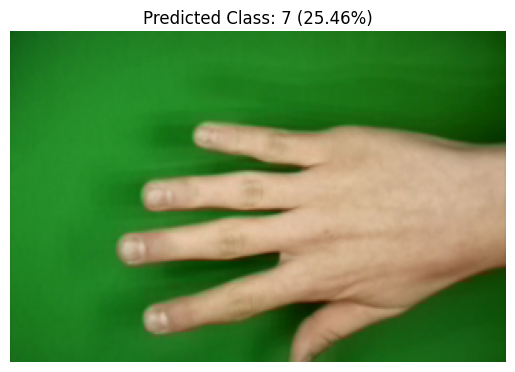

In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load Dataset (CIFAR-10 for simplicity)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 3: Load Pre-Trained Model (MobileNetV2)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model layers

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation="softmax")(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Step 4: Train the Model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

# Step 5: Save the Model
model.save("transfer_learning_model.h5")

# Step 6: Load Model and Test with OpenCV
loaded_model = tf.keras.models.load_model("transfer_learning_model.h5")

# Load and preprocess a custom image
def preprocess_image(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))  # Resize to input shape
    image = image / 255.0  # Normalize
    return np.expand_dims(image, axis=0)

# Path to your custom image
image_path = "/content/sample_image.jpg"

# Test the image
if not tf.io.gfile.exists(image_path):
    print("Image not found! Please provide a valid path.")
else:
    test_image = preprocess_image(image_path)
    predictions = loaded_model.predict(test_image)
    class_label = np.argmax(predictions)
    confidence = np.max(predictions)

    print(f"Predicted Class: {class_label} with Confidence: {confidence*100:.2f}%")

    # Visualize the image with OpenCV
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    plt.imshow(original_image)
    plt.title(f"Predicted Class: {class_label} ({confidence*100:.2f}%)")
    plt.axis("off")
    plt.show()


## **TRANSFERLEARNING+OBJECT DETECTION**

In [ ]:
# Step 1: Install Required Libraries
!pip install tensorflow opencv-python matplotlib

# Step 2: Import Libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load Pre-trained MobileNetV2 Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Assuming 2 classes (e.g., cat and dog)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Step 4: Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model on Custom Dataset
# Assuming dataset is uploaded and preprocessed into train and validation sets
# Replace 'train_generator' and 'val_generator' with actual data generators
# model.fit(train_generator, validation_data=val_generator, epochs=5)

# Step 6: Load a Pre-trained Model or Fine-tuned Model
# model.save('fine_tuned_model.h5')  # Save after training
model = tf.keras.models.load_model('fine_tuned_model.h5')  # Load pre-trained model

# Step 7: Object Detection and Tracking in Video
video_path = '/content/video.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

tracker = cv2.TrackerCSRT_create()  # Initialize OpenCV tracker
initBB = None  # Initialize bounding box
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of Video.")
        break

    frame_count += 1

    # Perform detection every alternate frame
    if frame_count % 2 == 0:
        # Preprocess frame for MobileNetV2
        resized_frame = cv2.resize(frame, (224, 224))
        input_tensor = np.expand_dims(resized_frame, axis=0)
        input_tensor = input_tensor / 255.0  # Normalize

        # Predict with the fine-tuned model
        predictions = model.predict(input_tensor)
        class_id = np.argmax(predictions[0])  # Get the detected class
        confidence = predictions[0][class_id]

        if confidence > 0.5:  # If confidence > threshold
            # Example bounding box (replace with actual detection)
            initBB = (50, 50, 200, 200)  # Replace with real detection coordinates
            tracker.init(frame, initBB)  # Initialize tracker

    # Update tracker if initialized
    if initBB is not None:
        success, box = tracker.update(frame)
        if success:
            x, y, w, h = [int(v) for v in box]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            label = f"Class {class_id} ({confidence:.2f})"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display frame
    cv2.imshow("Object Detection and Tracking", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
